**Task 1**

Load the trained models along with test sets

In [1]:
import pickle

with open('LogReg_model.pkl', 'rb') as f:
    logreg_model = pickle.load(f)

with open('NaiveBayes_model.pkl', 'rb') as f:
    naivebayes_model = pickle.load(f)

with open('test_set_ftidf.pkl', 'rb') as f:
    X_test_tfidf, y_test_tfidf = pickle.load(f)

with open('test_set_ftidf.pkl', 'rb') as f:
    X_test_oh, y_test_oh = pickle.load(f)

Make predictions

In [2]:
LR_pred = logreg_model.predict(X_test_oh)
NB_pred = naivebayes_model.predict(X_test_tfidf)

Evaluate predictions

In [3]:
from sklearn.metrics import f1_score, classification_report

LR_f1 = f1_score(y_true=y_test_oh, y_pred=LR_pred)
NB_f1 = f1_score(y_true=y_test_tfidf, y_pred=NB_pred)

print(f"Logistic Regression: f1 = {LR_f1:.5f}")
print(f"Naive Bayes: f1 = {NB_f1:.5f}")

Logistic Regression: f1 = 0.77977
Naive Bayes: f1 = 0.88215


**Task 2**

Load the LIAR dataset

In [4]:
import pandas as pd

df = pd.read_pickle('LIAR_onehot.pkl')
X_LIAR = df.drop(columns=['LABELS'])
y_LIAR = df['LABELS']
df.shape

(1267, 10001)

In [5]:
LR_pred_liar = logreg_model.predict(X_LIAR)
NB_pred_liar = naivebayes_model.predict(X_LIAR)

c:\Users\tobia\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MaxAbsScaler was fitted without feature names
  warnings.warn(
c:\Users\tobia\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [6]:
LR_f1 = f1_score(y_true=y_LIAR, y_pred=LR_pred_liar)
NB_f1 = f1_score(y_true=y_LIAR, y_pred=NB_pred_liar)

print(f"Logistic Regression: f1 = {LR_f1:.5f}")
print(f"Naive Bayes: f1 = {NB_f1:.5f}")

Logistic Regression: f1 = 0.71733
Naive Bayes: f1 = 0.63385


Calculate all confusion matrices

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_LR_FN = confusion_matrix(y_test_oh, LR_pred)
cm_NB_FN = confusion_matrix(y_test_tfidf, NB_pred)
cm_LR_LIAR = confusion_matrix(y_LIAR, LR_pred_liar)
cm_NB_LIAR = confusion_matrix(y_LIAR, NB_pred_liar)

Display LogReg FakeNews confusion matrix

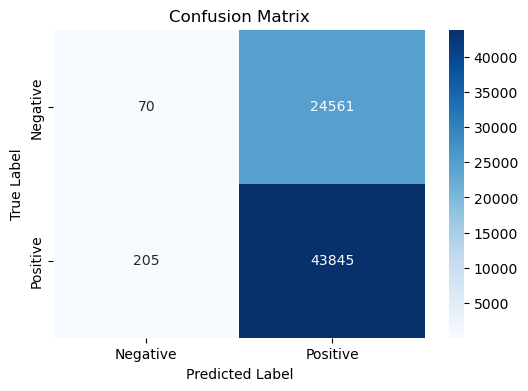

In [8]:


plt.figure(figsize=(6,4))
sns.heatmap(cm_LR_FN, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

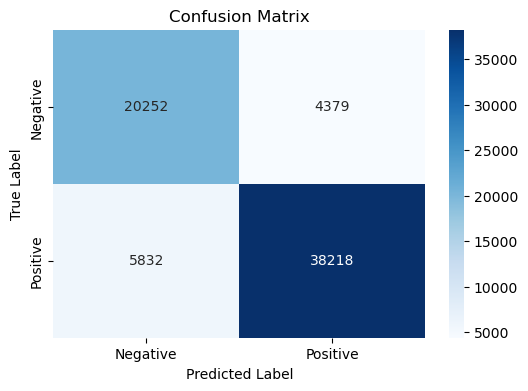

In [9]:
#Display confusion matrix for Naive Bayes FakeNews
plt.figure(figsize=(6,4))
sns.heatmap(cm_NB_FN, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

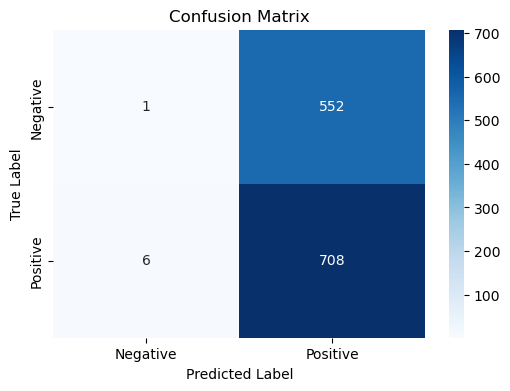

In [10]:
#Display confusion matrix for LogReg LIAR
plt.figure(figsize=(6,4))
sns.heatmap(cm_LR_LIAR, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

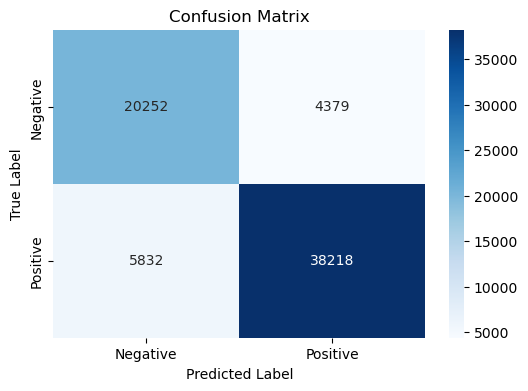

In [11]:
#Display confusion matrix for Naive Bayes LIAR
plt.figure(figsize=(6,4))
sns.heatmap(cm_NB_FN, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()